In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [42]:
data=pd.read_excel("D:/Data Analyst/End-To-End Projects/Complete Project/dataset/Regional Sales Dataset.xlsx",sheet_name=None)

In [43]:
data

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [44]:
sales_order=data["Sales Orders"]
customers=data["Customers"]
products=data["Products"]
regions=data["Regions"]
state_reg=data["State Regions"]
budgets=data["2017 Budgets"]

In [45]:
sales_order.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918


In [46]:
customers.head(2)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group


In [47]:
products.head(2)

,Index,Product Name
0,1,Product 1
1,2,Product 2


In [48]:
regions.head(2)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago


In [49]:
state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [50]:
new_header=state_reg.iloc[0]
state_reg.columns=new_header
state_reg=state_reg[1:].reset_index(drop=True)
state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [51]:
budgets.head(2)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565


In [52]:
print("Sales Shape:",sales_order.shape)
print("Customers Shape:",customers.shape)
print("Products Shape:",products.shape)
print("Regions Shape:",regions.shape)
print("state Regions Shape:",state_reg.shape)
print("budgets shape:",budgets.shape)

Sales Shape: (64104, 12)
Customers Shape: (175, 2)
Products Shape: (30, 2)
Regions Shape: (994, 15)
state Regions Shape: (48, 3)
budgets shape: (30, 2)


### Check null values

In [53]:
print("Sales :\n",sales_order.isnull().sum())
print("\nCustomers :\n",customers.isnull().sum())
print("\nProducts :\n",products.isnull().sum())
print("\nRegions :\n",regions.isnull().sum())
print("\nstate Regions :\n",state_reg.isnull().sum())
print("\nbudgets:\n",budgets.isnull().sum())

Sales :
 OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

Customers :
 Customer Index    0
Customer Names    0
dtype: int64

Products :
 Index           0
Product Name    0
dtype: int64

Regions :
 id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

state Regions :
 0
State Code    0
State         0
Region        0
dtype: int64

budgets:
 Product Name    0
2017 Budgets    0
dtype: int64


### Data Cleaning and Wrangling

In [54]:
#Merge with customers

Df=sales_order.merge(customers,how="left",
                     left_on="Customer Name Index",
                     right_on="Customer Index")
Df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [55]:
#Merge with product

Df=Df.merge(products,how="left",
                     left_on="Product Description Index",
                     right_on="Index")
Df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [56]:
#Merge with regions

Df=Df.merge(regions,how="left",
                     left_on="Delivery Region Index",
                     right_on="id")
Df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [57]:
#Merge with state regions

Df=Df.merge(state_reg[["State Code","Region"]],how="left",
                     left_on="state_code",
                     right_on="State Code")
Df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [58]:
#Merge with Bugets

Df=Df.merge(budgets,how="left",
                     on="Product Name")
Df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [62]:
#clean  up redundant columns
cols_to_drop=["Customer Index","Index","id","State Code"]
Df=Df.drop(columns=cols_to_drop,errors="ignore")

Df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [63]:
#convert all columns to lower case for consistency and easier access

Df.columns=Df.columns.str.lower()
Df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [64]:
#Keep the important columns and delete the columns that we dont need

cols_to_keep=['ordernumber',
              'orderdate','customer names', 'channel','product name',
              'order quantity', 'unit price',
              'line total', 'total unit cost', 'state_code', 'state','county',
              'latitude',
               'longitude',  'region','2017 budgets']
              


In [65]:
Df=Df[cols_to_keep]
Df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,state,county,latitude,longitude,region,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,39.61366,-86.10665,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,37.66243,-121.87468,West,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,39.16533,-86.52639,Midwest,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,41.77524,-72.52443,Northeast,1085037.329


### Rename columns:

In [67]:
Df=Df.rename(columns={"line total":"revenue","total unit cost":"cost","2017 budgets":"budgets"})

Df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,revenue,cost,state_code,state,county,latitude,longitude,region,budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,39.61366,-86.10665,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,37.66243,-121.87468,West,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,39.16533,-86.52639,Midwest,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,41.77524,-72.52443,Northeast,1085037.329


### Blank out bugets for non-2017 order


In [68]:
 Df.loc[Df["orderdate"].dt.year != 2017,"budgets"] = pd.NA

### Line total is revenue

In [69]:
Df[["orderdate","product name","revenue","budgets"]]

,orderdate,product name,revenue,budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
...,...,...,...,...
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN


In [70]:
Df

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,revenue,cost,state_code,state,county,latitude,longitude,region,budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,32.08354,-81.09983,South,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,39.61366,-86.10665,Midwest,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,37.66243,-121.87468,West,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,39.16533,-86.52639,Midwest,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,41.77524,-72.52443,Northeast,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Bucks County,40.15511,-74.82877,Northeast,NaN
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Cook County,42.11030,-88.03424,Midwest,NaN
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,Broward County,26.24453,-80.20644,South,NaN
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Erie County,42.91002,-78.74182,Northeast,NaN


### Information about dataset

In [71]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ordernumber     64104 non-null  object        
 1   orderdate       64104 non-null  datetime64[ns]
 2   customer names  64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product name    64104 non-null  object        
 5   order quantity  64104 non-null  int64         
 6   unit price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  state           64104 non-null  object        
 11  county          64104 non-null  object        
 12  latitude        64104 non-null  float64       
 13  longitude       64104 non-null  float64       
 14  region          64104 non-null  object        
 15  bu

### Filter the dataset to include only records from year 2017

In [72]:
Df_2017=Df[Df["orderdate"].dt.year == 2017]

In [73]:
Df_2017

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,revenue,cost,state_code,state,county,latitude,longitude,region,budgets
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,New Jersey,Hudson County,40.77955,-74.02375,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Colorado,Mesa County,39.06387,-108.55065,West,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,California,Los Angeles County,33.96168,-118.35313,West,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Iowa,Dubuque County,42.50056,-90.66457,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Florida,Hernando County,28.47689,-82.52546,South,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,Missouri,Jackson County/Clay County,39.08547,-94.35210,Midwest,3016489.209
61622,SO - 0004785,2017-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,Pennsylvania,Philadelphia County,39.95234,-75.16379,Northeast,2642352.432
61623,SO - 0004950,2017-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,Florida,Volusia County,29.13832,-80.99561,South,1672229.416
61624,SO - 0006829,2017-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,Connecticut,New Haven County,41.22509,-73.06111,Northeast,1672229.416


### Calculate total cost and profit

In [74]:
Df["total_cost"]=Df["order quantity"]* Df["cost"]

In [75]:
Df["profit"]=Df["revenue"]-Df["total_cost"]

Df["profit_margin_%"]=Df["profit"]/Df["revenue"]*100

In [76]:
Df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,revenue,cost,state_code,state,county,latitude,longitude,region,budgets,total_cost,profit,profit_margin_%
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,32.08354,-81.09983,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,37.66243,-121.87468,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,39.16533,-86.52639,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,41.77524,-72.52443,Northeast,NaN,10082.160,8249.040,45.0


## EXPLORATORY DATA ANALYSIS 

#### Top 10 Products

In [92]:
product_revenue=Df.groupby("product name")["revenue"].sum().reset_index()

In [95]:
top_10=product_revenue.sort_values(by="revenue",ascending=False).head(10)
top_10

,product name,revenue
18,Product 26,117291821.4
17,Product 25,109473966.6
4,Product 13,78281379.6
5,Product 14,75390396.6
25,Product 5,70804380.6
6,Product 15,67331623.2
11,Product 2,57401097.6
24,Product 4,56701537.2
0,Product 1,55952289.6
22,Product 3,51764816.4


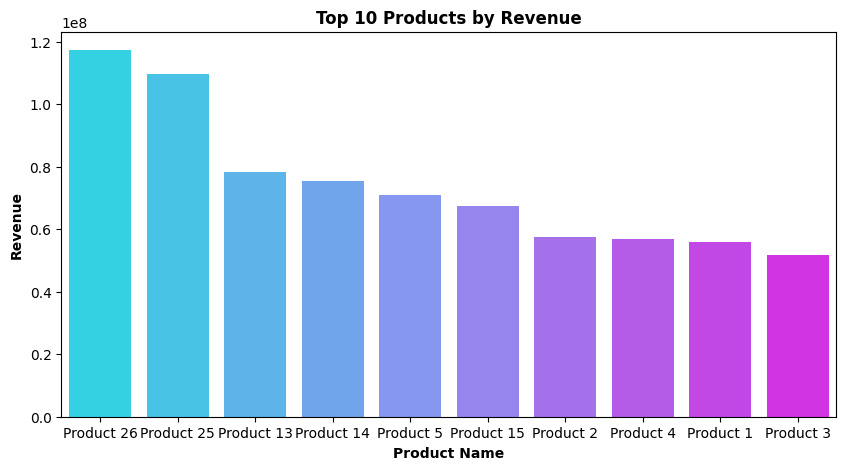

In [201]:
plt.figure(figsize=(10,5))
sns.barplot(x="product name",y="revenue",data=top_10,palette="cool")
plt.xlabel("Product Name",fontweight="bold")
plt.ylabel("Revenue",fontweight="bold")
plt.title("Top 10 Products by Revenue",fontweight="bold")
plt.show()

#### Sales by channel

In [114]:
chan_sales=Df.groupby("channel")["revenue"].sum().sort_values(ascending=True)
chan_sales

channel
Export         180631866.0
Distributor    387139788.6
Wholesale      668197244.4
Name: revenue, dtype: float64

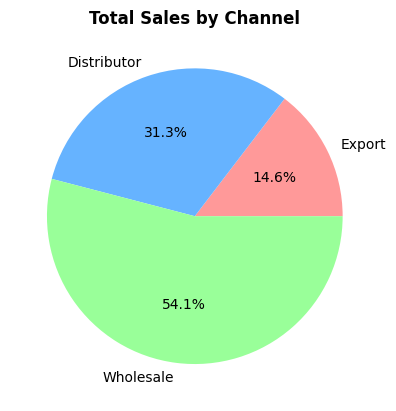

In [121]:
colors=["#ff9999","#66b3ff","#99ff99"]
plt.pie(chan_sales.values,labels=chan_sales.index,autopct="%1.1f%%",colors=colors)
plt.title("Total Sales by Channel",fontweight="bold")
plt.show()

#### Average order value distribution

In [122]:
Avg_od=Df.groupby("ordernumber")["revenue"].sum()
Avg_od

ordernumber
SO - 0001000     38592.0
SO - 0001001      8361.6
SO - 0001002    347127.0
SO - 0001003    195372.0
SO - 0001004     81686.4
                  ...   
SO - 0010780    163212.0
SO - 0010781     47275.2
SO - 0010782     79113.6
SO - 0010783     40762.8
SO - 0010784    345800.4
Name: revenue, Length: 10684, dtype: float64

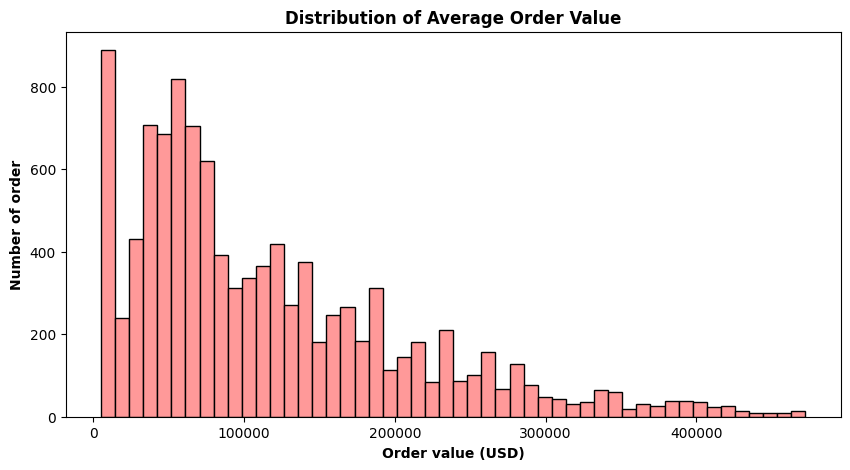

In [127]:
plt.figure(figsize=(10,5))
plt.hist(Avg_od,bins=50,color="#ff9999",edgecolor="black")
plt.title("Distribution of Average Order Value",fontweight="bold")
plt.xlabel("Order value (USD)",fontweight="bold")
plt.ylabel("Number of order",fontweight="bold")
plt.show()

#### Top 10 states by Revenue and order count

In [148]:
State_Rev=Df.groupby("state")["revenue"].sum().sort_values(ascending=False).reset_index()
State_Rev

,state,revenue
0,California,228785436.0
1,Illinois,111050965.7
2,Florida,90204679.5
3,Texas,84011903.0
4,New York,55534960.0
5,Indiana,54601690.2
6,New Jersey,46830956.5
7,Connecticut,44251228.7
8,Michigan,39025315.8
9,Massachusetts,35011942.1


In [149]:
Top_10_rev=State_Rev.head(10)

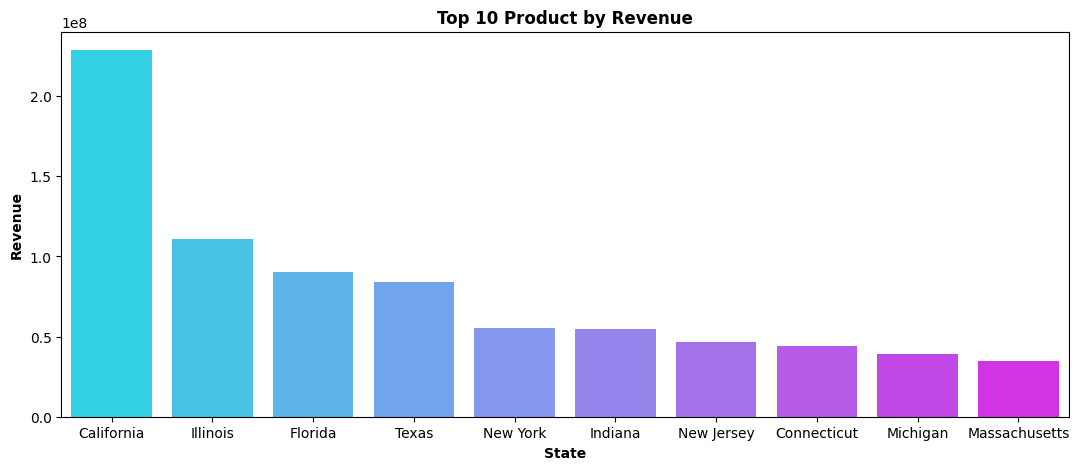

In [202]:
plt.figure(figsize=(13,5))
sns.barplot(x="state",y="revenue",data=Top_10_rev,palette="cool")
plt.xlabel("State",fontweight="bold")
plt.ylabel("Revenue",fontweight="bold")
plt.title("Top 10 Product by Revenue",fontweight="bold")
plt.show()

#### Average Profit MArgin by channel

In [172]:
channel_margin=Df.groupby("channel")["profit_margin_%"].mean().sort_values(ascending=False).reset_index()
channel_margin

,channel,profit_margin_%
0,Export,37.932704
1,Distributor,37.557091
2,Wholesale,37.087236


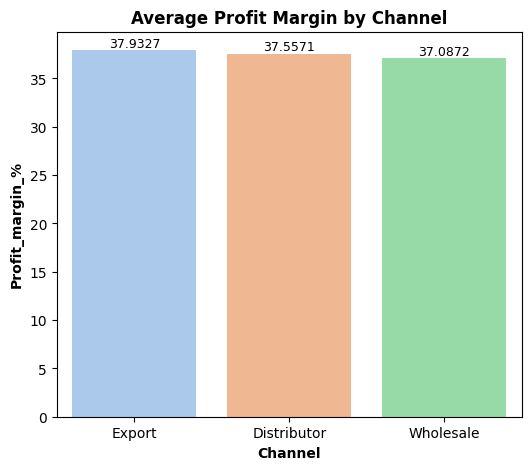

In [203]:
plt.figure(figsize=(6,5))
ax=sns.barplot(x="channel",y="profit_margin_%",data=channel_margin,palette="pastel")
plt.xlabel("Channel",fontweight="bold")
plt.ylabel("Profit_margin_%",fontweight="bold")
plt.title("Average Profit Margin by Channel",fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,label_type="edge",fontsize=9,color="black")
plt.show()

#### Top 10 customers by revenue

In [183]:
Top_cust=Df.groupby("customer names")["revenue"].sum().sort_values(ascending=False).reset_index().head(10)
Top_cust

,customer names,revenue
0,Aibox Company,12641251.8
1,State Ltd,12220639.2
2,Pixoboo Corp,10986459.0
3,Organon Corp,10955826.6
4,Realbuzz Ltd,10753299.0
5,WOCKHARDT Group,10701963.6
6,Kare Corp,10635633.6
7,Colgate-Pa Group,10107003.6
8,Golden Corp,10007669.4
9,Deseret Group,9942223.8


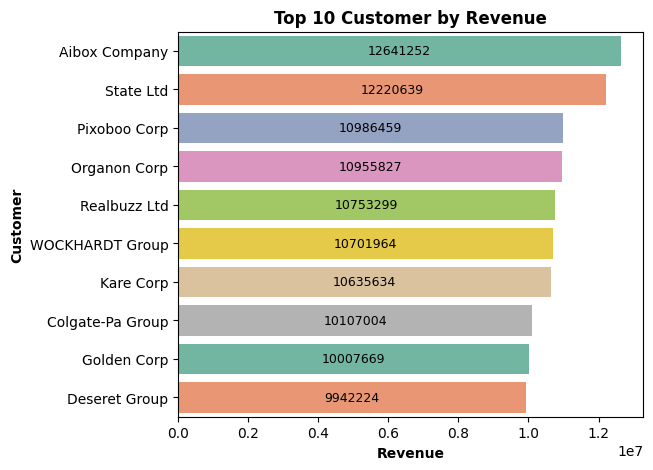

In [204]:
plt.figure(figsize=(6,5))
ax=sns.barplot(y="customer names",x="revenue",data=Top_cust,palette="Set2")
plt.ylabel("Customer",fontweight="bold")
plt.xlabel("Revenue",fontweight="bold")
plt.title("Top 10 Customer by Revenue",fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f",label_type="center",fontsize=9,color="black")
plt.show()

#### Customer Segmentation :Revenue vs Profit Margin

In [205]:
cust_summary=Df.groupby("customer names").agg(total_revenue=("revenue","sum"),
                                              total_profit=("profit","sum"),
                                              avg_margin=("profit_margin_%","mean"),
                                              orders=("ordernumber","nunique"))
                                              

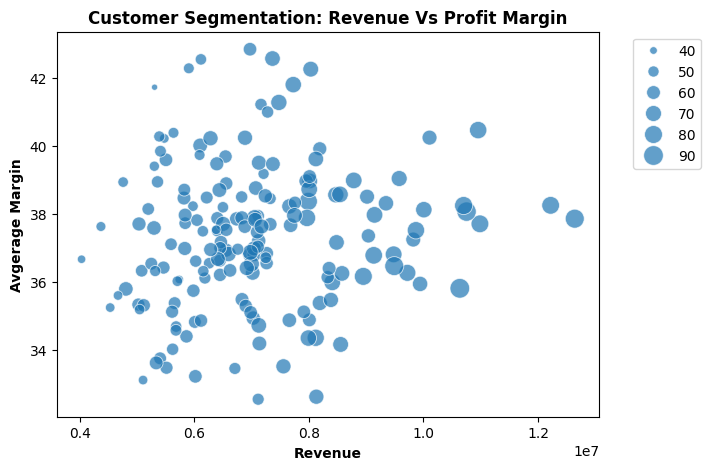

In [210]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="total_revenue",y="avg_margin",size="orders",data=cust_summary,sizes=(20,200),alpha=0.7)
plt.title("Customer Segmentation: Revenue Vs Profit Margin",fontweight="bold")
plt.xlabel("Revenue",fontweight="bold")
plt.ylabel("Avgerage Margin",fontweight="bold")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()